In [87]:
%load_ext autoreload
%autoreload 2
import sys;sys.path.append('../src')
from MLP import *
import seaborn as sns
import glob 
import numpy as np


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfTransformer
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [89]:
def confmat(y_values,y_pred,target_name):
    print (classification_report(y_values,y_pred,target_names=target_name)) 
    confmat=confusion_matrix(y_true=y_values,y_pred=y_pred)
    fig,ax=plt.subplots(figsize=(2.5,2.5))
    ax.matshow(confmat,cmap=plt.cm.Blues,alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j,y=i,s=confmat[i,j],va='center',ha='center')
    plt.xlabel('predicted label')       
    plt.ylabel('true label')     
    plt.tight_layout()
    plt.show()

KeyError: 'rep_name'

In [124]:
df=pd.read_csv('0107形容詞bow.csv',encoding='utf-8',engine='python',index_col=0)
df.head()


,いい,そぐわない,ない,にくい,ほしい,よい,よろしい,多い,大きい,小さい,...,でっかい,素早い,心強い,果てしない,めでたい,生々しい,騒がしい,rep_name,label,sum
0,2.0,1.0,5.0,2.0,1.0,2.0,1.0,4.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,津村啓介,0.0,36.0
1,43.0,0.0,85.0,0.0,2.0,8.0,13.0,15.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,前原誠司,0.0,281.0
2,44.0,0.0,109.0,2.0,12.0,2.0,15.0,4.0,9.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,階猛,0.0,308.0
3,42.0,0.0,57.0,0.0,8.0,3.0,8.0,4.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,辻元清美,0.0,176.0
4,25.0,0.0,55.0,3.0,0.0,9.0,11.0,4.0,6.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,細野豪志,0.0,219.0


In [130]:
rep=df['rep_name']
a=list(rep.iloc[0:56].values)
for b in a:
    print(b,end=',')

津村啓介,前原誠司,階猛,辻元清美,細野豪志,山井和則,宮崎岳志,本村賢太郎,岸本周平,井出庸生,馬淵澄夫,石関貴史,西村智奈美,松野頼久,初鹿明博,阿部知子,岡本充功,小山展弘,渡辺周,逢坂誠二,青柳陽一郎,落合貴之,小熊慎司,長妻昭,大串博志,岡田克也,篠原孝,古川元久,下村博文,菅原一秀,野田毅,加藤紘一,町村信孝,小里泰弘,富田茂之,金子一義,菅義偉,田村憲久,谷川弥一,谷畑孝,山本幸三,塩崎恭久,武部勤,金田勝年,遠山清彦,小泉進次郎,齋藤健,馳浩,赤澤亮正,伊東良孝,橘慶一郎,高木陽介,東順治,小野寺五典,小池百合子,佐田玄一郎,

In [118]:
# df.set_index('Unnamed: 0',inplace=True)

df=df.iloc[:57,:]
label=df['label']
df=df.loc[:, df.columns.str.match('[^\x01-\x7E]')]
df = df.select_dtypes(exclude='object')

In [119]:
X=df.values
Y=label.values
CLF=RandomForestClassifier(random_state=1)
CLF2=MultinomialNB()
CLF.fit(X,Y)
CLF2.fit(X,Y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

              precision    recall  f1-score   support

     新（0,民主）       0.61      0.79      0.69        29
     旧（1,自民）       0.68      0.46      0.55        28

   micro avg       0.63      0.63      0.63        57
   macro avg       0.64      0.63      0.62        57
weighted avg       0.64      0.63      0.62        57



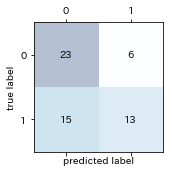

              precision    recall  f1-score   support

     新（0,民主）       0.89      0.55      0.68        29
     旧（1,自民）       0.67      0.93      0.78        28

   micro avg       0.74      0.74      0.74        57
   macro avg       0.78      0.74      0.73        57
weighted avg       0.78      0.74      0.73        57



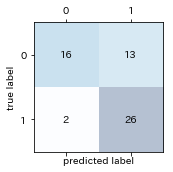

In [122]:
LABEL_NAME=['新（0,民主）','旧（1,自民）']
y_pred=cross_val_predict(CLF,X,Y,cv=5)
y_pred2=cross_val_predict(CLF2,X,Y,cv=5)

confmat(Y,y_pred,LABEL_NAME)
confmat(Y,y_pred2,LABEL_NAME)

In [120]:
fti = CLF.feature_importances_ 
# feature_df=pd.DataFrame(index=)
feature=pd.Series(fti,index=df.columns).sort_values(ascending=False)


# fti.shape

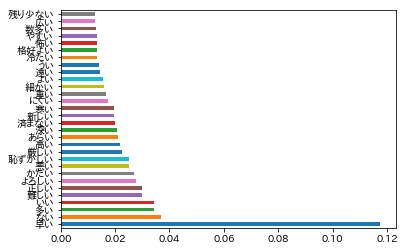

In [121]:
plt.rcParams['font.family'] = 'IPAPGothic'
feature.iloc[:30].plot.barh()